In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
os.chdir("C:\\Users\\adams\\Documents\\Bakalárska práca\\archive")

df = pd.read_csv("summer-products-with-rating-and-performance_2020-08.csv")

In [3]:
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [5]:
dupe=df[df.duplicated()]

In [6]:
dupe

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
311,Women's Summer Fashion Spaghetti Strap Dress F...,Women's Summer Fashion Spaghetti Strap Dress F...,8.00,7,EUR,50,0,3.88,8,5.0,...,334,3.736527,5dda40561fead208515f98e2,0,NaN,https://www.wish.com/c/5ea91e4d29b81241e1d43b27,https://contestimg.wish.com/api/webimage/5ea91...,5ea91e4d29b81241e1d43b27,summer,2020-08
411,New Women Ladies Fashion Summer Skinny High Wa...,New Women Ladies Fashion Summer Skinny High Wa...,14.00,12,EUR,5000,1,4.06,643,365.0,...,80093,4.006692,583138b06339b410ab9663ec,0,NaN,https://www.wish.com/c/5c80e8a150c63d28c67b8f14,https://contestimg.wish.com/api/webimage/5c80e...,5c80e8a150c63d28c67b8f14,summer,2020-08
447,Womens Summer Fashion Lip Print 2pc Set Ladies...,Womens Summer Fashion Lip Print 2pc Set Ladies...,5.00,51,EUR,10,0,5.00,0,NaN,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5eb90ab5ad67f63678d15ed9,https://contestimg.wish.com/api/webimage/5eb90...,5eb90ab5ad67f63678d15ed9,summer,2020-08
505,Plus la taille des femmes de la mode lâche déc...,Plus Size Women's Fashion Loose Casual sleevel...,5.83,5,EUR,100,0,4.36,22,13.0,...,17471,3.952836,5aab3c8ea6bf7a704caec65c,0,NaN,https://www.wish.com/c/5e9932cab3eafb25c00ba79f,https://contestimg.wish.com/api/webimage/5e993...,5e9932cab3eafb25c00ba79f,summer,2020-08
571,Summer Women Fashion Fashion Robe courte sans ...,Summer Women Fashion Short Dress Sleeveless Wa...,8.00,51,EUR,100,0,4.29,31,19.0,...,5846,3.832535,5a792e56a71fbf471cf1fc99,0,NaN,https://www.wish.com/c/5d78eb19cc404c03393c83b5,https://contestimg.wish.com/api/webimage/5d78e...,5d78eb19cc404c03393c83b5,summer,2020-08
684,Femmes d'été Boho Maxi Polka Dot Robe Irréguli...,Summer Women Boho Maxi Polka Dot Dress Irregul...,6.00,6,EUR,100,1,3.67,27,9.0,...,4705,4.040595,580c7d0a8b67fa197454a2d1,0,NaN,https://www.wish.com/c/5e142dee04c3e579e89576a3,https://contestimg.wish.com/api/webimage/5e142...,5e142dee04c3e579e89576a3,summer,2020-08
689,Femmes d'été Mode Shorts de sport double couch...,Summer Women Fashion Double-Layer Sports Short...,3.76,7,EUR,50,0,3.50,8,4.0,...,3730,3.880429,58d8e8ebd929c652b9c04c05,0,NaN,https://www.wish.com/c/5ebe625c3cdb6c40b7b9231e,https://contestimg.wish.com/api/webimage/5ebe6...,5ebe625c3cdb6c40b7b9231e,summer,2020-08
698,Débardeur en coton sans manches pour femmes,Women's Summer Sleeveless Tank Cotton Vest Pri...,6.00,7,EUR,50,0,2.67,3,1.0,...,1374,4.058952,5a2fa9ce6ea4a770c66f5599,0,NaN,https://www.wish.com/c/5eb4f323b67a8d189a8f8380,https://contestimg.wish.com/api/webimage/5eb4f...,5eb4f323b67a8d189a8f8380,summer,2020-08
770,Nouvelle mode d'été femmes robe décontractée c...,New Fashion Summer Women Casual Dress Round Ne...,2.00,9,EUR,100,0,3.47,32,11.0,...,4856,4.167628,5710ac98b2d43a5925da8dd8,0,NaN,https://www.wish.com/c/5e940265ea3640c9ca0353aa,https://contestimg.wish.com/api/webimage/5e940...,5e940265ea3640c9ca0353aa,summer,2020-08
991,2020 Shorts classiques pour hommes d'été Panta...,2020 Summer Men's Classic Shorts Multi-pocket ...,7.00,17,EUR,10,0,5.00,2,2.0,...,46,3.608696,5e2ecb9deed5087a7ba2f5f7,0,NaN,https://www.wish.com/c/5eeef4c4066647a9388a8ac2,https://contestimg.wish.com/api/webimage/5eeef...,5eeef4c4066647a9388a8ac2,summer,2020-08


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.isnull().values.any()

True

In [9]:
df.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 43
rating_four_count                 43
rating_three_count                43
rating_two_count                  43
rating_one_count                  43
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [10]:
df['has_urgency_banner'].fillna(0, inplace=True)

In [11]:
del df['urgency_text'] 

In [12]:
del df['merchant_profile_picture'] 

In [13]:
del df['product_color'] 

In [14]:
del df['product_variation_size_id']

In [15]:
del df['origin_country']

In [16]:
df.isnull().values.any()

True

In [17]:
df['uses_ad_boosts'].value_counts()

0    868
1    671
Name: uses_ad_boosts, dtype: int64

<AxesSubplot:>

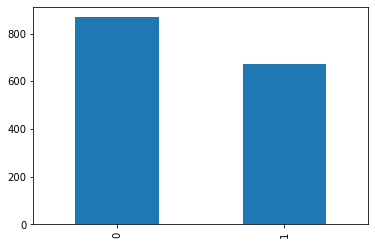

In [18]:
df['uses_ad_boosts'].value_counts().plot(kind='bar') 

In [19]:
671/1539

0.4359974009096816

In [20]:
from scipy.stats import shapiro 

In [21]:
shapiro(df['units_sold'])

ShapiroResult(statistic=0.464181125164032, pvalue=0.0)

In [22]:
a = df[df['uses_ad_boosts']==0]
b = df[df['uses_ad_boosts']==1]

In [23]:
a.iloc[:,[5]]

,units_sold
0,100
2,100
5,10
6,50000
7,1000
...,...
1562,100
1563,100
1564,1000
1570,100


In [24]:
b.iloc[:,[5]]

,units_sold
1,20000
3,5000
4,100
8,100
11,100
...,...
1566,100
1567,20000
1568,10000
1569,100


In [25]:
from scipy.stats import mannwhitneyu

In [26]:
mannwhitneyu(df['units_sold'][df['uses_ad_boosts'] == 0],
                df['units_sold'][df['uses_ad_boosts'] == 1])

MannwhitneyuResult(statistic=289311.0, pvalue=0.4104338130564246)

In [27]:
from scipy.stats import ttest_ind

In [28]:
ttest_ind(df['units_sold'][df['uses_ad_boosts'] == 0],
                df['units_sold'][df['uses_ad_boosts'] == 1])

Ttest_indResult(statistic=0.7918771666716706, pvalue=0.4285544944650025)

In [29]:
from scipy.stats import kstest

In [30]:
kstest(df["price"], 'norm')

KstestResult(statistic=0.9532082826067265, pvalue=0.0)

In [31]:
kstest(df["rating"], 'norm')

KstestResult(statistic=0.9829097803506945, pvalue=0.0)

In [32]:
df['price'].mean()

8.356452241715388

In [33]:
a = df[df['price']<=8.35] 
b = df[df['price']>=8.35] 

In [34]:
a.iloc[:,[7]]

,rating
1,3.45
2,3.57
3,4.03
4,3.10
5,5.00
...,...
1567,4.25
1568,4.08
1569,3.07
1570,3.71


In [35]:
b.iloc[:,[7]]

,rating
0,3.76
7,3.76
8,3.47
15,3.92
16,3.72
...,...
1558,4.12
1559,4.05
1563,3.51
1566,3.54


In [36]:
ttest_ind(df['rating'][df['price'] >= 8.35 ], df['rating'][df['price'] <= 8.35 ]) 

Ttest_indResult(statistic=1.392317235513609, pvalue=0.16402775394974342)

In [37]:
from scipy.stats import spearmanr

In [38]:
spearmanr(df['price'],df['rating'])

SpearmanrResult(correlation=0.05900676058363518, pvalue=0.02061419440396427)

In [39]:
from scipy.stats import pearsonr

In [40]:
pearsonr(df['rating'], df['merchant_rating'])

(0.24457446339286687, 2.136173163555255e-22)

In [41]:
spearmanr(df['rating'], df['merchant_rating'])

SpearmanrResult(correlation=0.2610657655954483, pvalue=2.130611444855418e-25)

In [42]:
df['badges_count'].value_counts()

0    1391
1     135
2      11
3       2
Name: badges_count, dtype: int64

<AxesSubplot:>

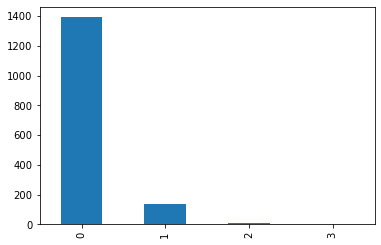

In [43]:
df['badges_count'].value_counts().plot(kind='bar') 

In [44]:
df_none=df[df['badges_count']==0]
df_one=df[df['badges_count']==1]
df_two=df[df['badges_count']==2]
df_three=df[df['badges_count']==3]

In [45]:
from scipy.stats import kruskal

In [46]:
kruskal(df_none['units_sold'],df_one['units_sold'],df_two['units_sold'],df_three['units_sold'])

KruskalResult(statistic=29.104534985986774, pvalue=2.1289733381272446e-06)

In [47]:
ttest_ind(df_none['units_sold'],df_one['units_sold'])

Ttest_indResult(statistic=-2.566091749404669, pvalue=0.010380013274921818)

In [48]:
mannwhitneyu(df_none['units_sold'],df_one['units_sold'])

MannwhitneyuResult(statistic=69999.0, pvalue=2.482537191241913e-07)

(array([1283.,   89.,    0.,    0.,   13.,    0.,    0.,    0.,    0.,
           6.]),
 array([1.00000e+00, 1.00009e+04, 2.00008e+04, 3.00007e+04, 4.00006e+04,
        5.00005e+04, 6.00004e+04, 7.00003e+04, 8.00002e+04, 9.00001e+04,
        1.00000e+05]),
 <BarContainer object of 10 artists>)

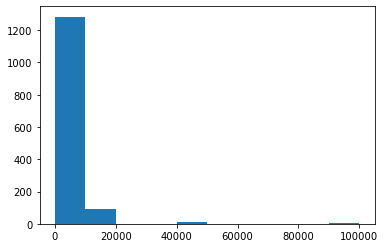

In [51]:
plt.hist(df_none['units_sold'])

(array([93., 25.,  0., 13.,  0.,  0.,  0.,  0.,  0.,  4.]),
 array([  100.,  5090., 10080., 15070., 20060., 25050., 30040., 35030.,
        40020., 45010., 50000.]),
 <BarContainer object of 10 artists>)

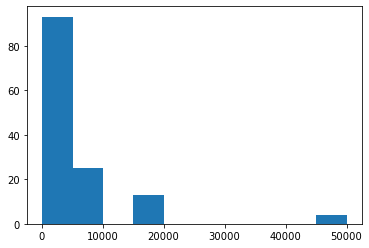

In [52]:
plt.hist(df_one['units_sold'])

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  100.,  2090.,  4080.,  6070.,  8060., 10050., 12040., 14030.,
        16020., 18010., 20000.]),
 <BarContainer object of 10 artists>)

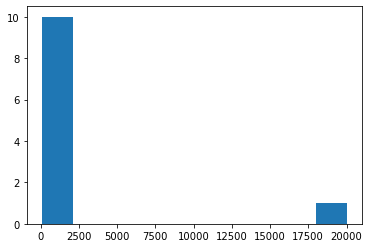

In [53]:
plt.hist(df_two['units_sold'])

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 1000.,  1900.,  2800.,  3700.,  4600.,  5500.,  6400.,  7300.,
         8200.,  9100., 10000.]),
 <BarContainer object of 10 artists>)

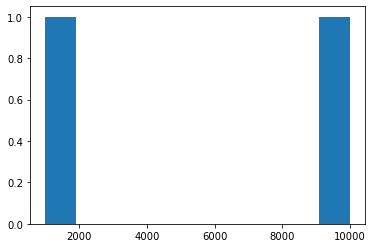

In [54]:
plt.hist(df_three['units_sold'])

In [55]:
df_none['units_sold'].mean()

4244.713874910137

In [56]:
df_one['units_sold'].mean()

6429.62962962963

In [57]:
df_two['units_sold'].mean()

2072.7272727272725

In [58]:
df_three['units_sold'].mean()

5500.0

In [59]:
5500+2072.73+6429.63

14002.36

In [60]:
3*4244.71

12734.130000000001

In [61]:
12734.13/14002.36

0.9094274108078922

(array([ 43.,  36.,  49., 232., 172.,  89.,  53., 223.,  24.,  37.,  38.,
         23.,  46.,   3.,   7.,  15.,  25.,   3.,   4.,  54.,   4.,   3.,
          1.,  23.,   2.,  16.,  16.,   1.,   2.,   9.,   0.,   3.,   7.,
         16.,   0.,   1.,  11.,   8.,   6.,  26.,   0.,   1.,   2.,  14.,
          1.,   5.,  21.,   3.,   0.,   0.,   8.,   1.,   4.,  11.,   2.,
          0.,   3.,   0.,   7.,  12.,   0.,   0.,   0.,   4.,   0.,   2.,
         40.,   2.,   1.,   2.,   3.,   0.,   4.,   3.,   0.,   0.,   1.,
          0.,   1.,   1.,   5.,   0.,   2.,   2.,   1.,   4.,   2.,   1.,
          0.,   0.,   2.,   0.,   0.,   3.,   0.,   0.,   1.,   0.,   0.,
          1.,   2.,   0.,   0.,   0.,   0.,   2.,   1.,   0.,   0.,   1.,
          3.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,   4.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

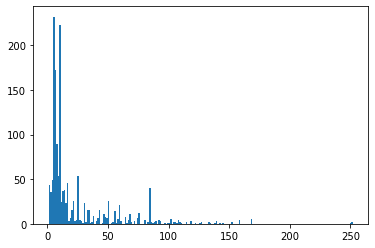

In [73]:
plt.hist(df['retail_price'], bins=200)

In [62]:
df['discount']=df['retail_price']-df['price']

In [84]:
df.iloc[:,[38]]

,discount
0,-2.00
1,14.00
2,35.00
3,0.00
4,0.28
...,...
1568,3.00
1569,54.00
1570,14.00
1571,-2.00


(array([ 93., 831., 112.,  70.,  54.,  44.,  42.,  18.,  29.,  37.,  22.,
         20.,  25.,  12.,  14.,  30.,  29.,   5.,   6.,   7.,   7.,   3.,
          1.,   2.,   1.,   4.,   2.,   2.,   3.,   4.,   2.,   2.,   3.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   3.]),
 array([ -7.  ,  -1.98,   3.04,   8.06,  13.08,  18.1 ,  23.12,  28.14,
         33.16,  38.18,  43.2 ,  48.22,  53.24,  58.26,  63.28,  68.3 ,
         73.32,  78.34,  83.36,  88.38,  93.4 ,  98.42, 103.44, 108.46,
        113.48, 118.5 , 123.52, 128.54, 133.56, 138.58, 143.6 , 148.62,
        153.64, 158.66, 163.68, 168.7 , 173.72, 178.74, 183.76, 188.78,
        193.8 , 198.82, 203.84, 208.86, 213.88, 218.9 , 223.92, 228.94,
        233.96, 238.98, 244.  ]),
 <BarContainer object of 50 artists>)

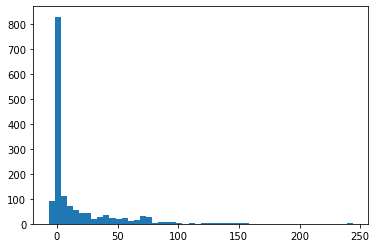

In [64]:
plt.hist(df['discount'], bins=50)

(array([ 37.,  69.,  67.,  51., 154., 154., 124., 277., 125.,   0., 197.,
         81.,  54.,  56.,  22.,  41.,   2.,   9.,   6.,   4.,   0.,   3.,
          1.,   1.,   0.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 1.  ,  1.96,  2.92,  3.88,  4.84,  5.8 ,  6.76,  7.72,  8.68,
         9.64, 10.6 , 11.56, 12.52, 13.48, 14.44, 15.4 , 16.36, 17.32,
        18.28, 19.24, 20.2 , 21.16, 22.12, 23.08, 24.04, 25.  , 25.96,
        26.92, 27.88, 28.84, 29.8 , 30.76, 31.72, 32.68, 33.64, 34.6 ,
        35.56, 36.52, 37.48, 38.44, 39.4 , 40.36, 41.32, 42.28, 43.24,
        44.2 , 45.16, 46.12, 47.08, 48.04, 49.  ]),
 <BarContainer object of 50 artists>)

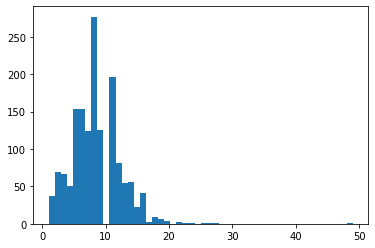

In [72]:
plt.hist(df['price'], bins=50)

In [74]:
df['has_urgency_banner'].value_counts()

0.0    1071
1.0     468
Name: has_urgency_banner, dtype: int64

<AxesSubplot:>

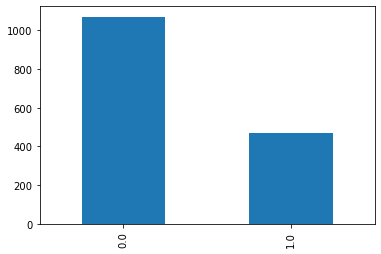

In [86]:
df['has_urgency_banner'].value_counts().plot(kind='bar')

In [75]:
ttest_ind(df['discount'][df['has_urgency_banner']==1],df['discount'][df['has_urgency_banner']==0]) 

Ttest_indResult(statistic=-0.3330982429647384, pvalue=0.7391055556424455)